In [1]:
#Load libraries
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [4]:
#Set working directory
os.chdir("D:\Data scientist\Project\Bike Rental")

In [100]:
#Load data
day = pd.read_csv("day.csv")

In [101]:
#Read first 10 Data
day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,06-01-2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,07-01-2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,08-01-2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,09-01-2011,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,10-01-2011,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [102]:
#Renaming the columns
day.rename(columns={'instant':'sr.no','dteday':'date','yr':'year','mnth':'month','weathersit':'weather_situation','hum':'humidity','temp':'normalised_temp','atemp':'apparent_temp','cnt':'count'},inplace=True)

In [103]:
#Datatype Conversion
day['date']=pd.to_datetime(day.date, format= '%d-%m-%Y')
day['season']=day['season'].astype('category')
day['year']=day['year'].astype('category')
day['month']=day['month'].astype('category')
day['holiday']=day['holiday'].astype('category')
day['weekday']=day['weekday'].astype('category')
day['workingday']=day['workingday'].astype('category')
day['weather_situation']=day['weather_situation'].astype('category')

## Exploratory Data Analysis

### Data visualisation

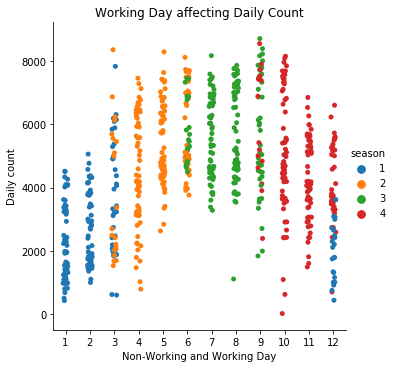

In [10]:
# Months affecting Count based on Season
month_count=sns.catplot("month","count",hue="season",data=day) 
month_count.set(xlabel="Non-Working and Working Day",ylabel="Daily count", title="Working Day affecting Daily Count")

                      1:Springer          2:Summer          3:Fall           4:Winter

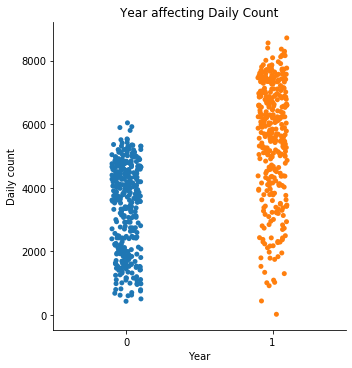

In [11]:
# Year affecting Count
year_cnt=sns.catplot("year","count",data=day) 
year_cnt.set(xlabel="Year",ylabel="Daily count", title="Year affecting Daily Count")

              0:2011              1:2012

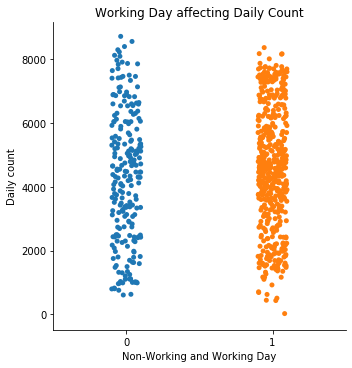

In [14]:
# Season affecting Count based on working and non-working day
wday_count=sns.catplot("workingday","count",data=day) 
wday_count.set(xlabel="Non-Working and Working Day",ylabel="Daily count", title="Working Day affecting Daily Count")

0 means Holiday, 1 means day is neither weekend nor holiday(Working Day).

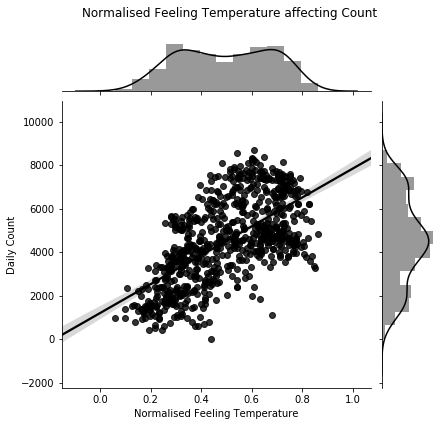

In [15]:
# Normalised Feeling Temperature affecting Count
temp_cnt=sns.jointplot(x="normalised_temp",y="count",color='#000000',kind="reg",data=day)
temp_cnt.set_axis_labels("Normalised Feeling Temperature","Daily Count")
temp_cnt.fig.suptitle("Normalised Feeling Temperature affecting Count")
temp_cnt.fig.subplots_adjust(top=0.9)

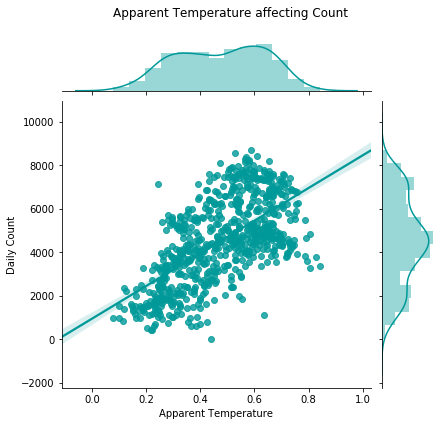

In [16]:
# Apparent Temperature affecting Count
atemp_cnt=sns.jointplot(x="apparent_temp",y="count",color='#009999',kind="reg",data=day)
atemp_cnt.set_axis_labels("Apparent Temperature","Daily Count")
atemp_cnt.fig.suptitle("Apparent Temperature affecting Count")
atemp_cnt.fig.subplots_adjust(top=0.9)

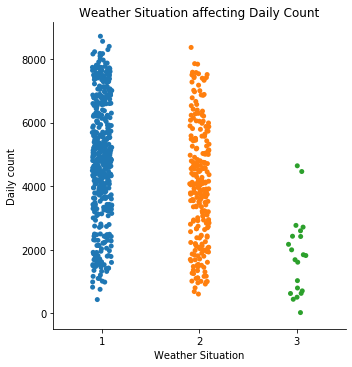

In [17]:
# Weather situations affecting Count 
weathersit_cnt=sns.catplot("weather_situation","count",data=day) 
weathersit_cnt.set(xlabel="Weather Situation",ylabel="Daily count", title="Weather Situation affecting Daily Count")

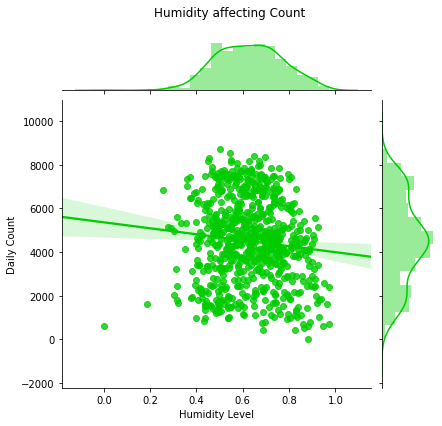

In [18]:
#Humidity affecting Count
hum_cnt=sns.jointplot(x="humidity",y="count",color='#00CC00',kind="reg",data=day)
hum_cnt.set_axis_labels("Humidity Level","Daily Count")
hum_cnt.fig.suptitle("Humidity affecting Count")
hum_cnt.fig.subplots_adjust(top=0.9)

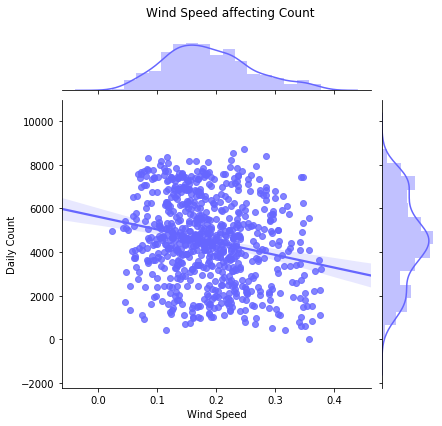

In [98]:
#Windspeed affecting Count
windspd_cnt=sns.jointplot(x="windspeed",y="count",color='#6666FF',kind="reg",data=day)
windspd_cnt.set_axis_labels("Wind Speed","Daily Count")
windspd_cnt.fig.suptitle("Wind Speed affecting Count")
windspd_cnt.fig.subplots_adjust(top=0.9)

## Data Pre-processing

### Feature Engineering

In [104]:
#Extracting day of the month from the date
day['daynum']=day['date'].dt.day

In [105]:
#Dropping dteday column
day.drop(["date"], axis = 1, inplace = True) 

### Missing Value Analysis

In [106]:
#Creating dataframe with missing percentagee
missing_val = pd.DataFrame(day.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(day))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,sr.no,0.0
1,season,0.0
2,year,0.0
3,month,0.0
4,holiday,0.0
5,weekday,0.0
6,workingday,0.0
7,weather_situation,0.0
8,normalised_temp,0.0
9,apparent_temp,0.0


### One Hot Encoding

In [107]:
day=pd.get_dummies(day, prefix=None, prefix_sep='_', dummy_na=False, columns=["season","month","weekday","weather_situation"], sparse=False, drop_first=False, dtype=int)

### Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x183b3bf5b08>,
 'caps': [<matplotlib.lines.Line2D at 0x183b3bf5c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x183b3bf5308>],
 'medians': [<matplotlib.lines.Line2D at 0x183b3bfafc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x183b3bfacc8>],
 'means': []}

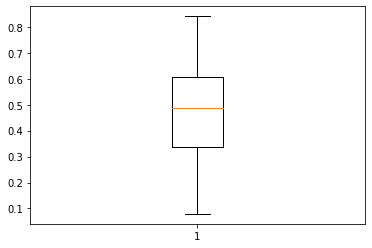

In [108]:
# Plotting boxplot to visualize Outliers
#Checking for outliers in Apparent Temperature
%matplotlib inline
plt.boxplot(day['apparent_temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x183b3c5afc8>,
 'caps': [<matplotlib.lines.Line2D at 0x183b3c5fb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x183b3c5a7c8>],
 'medians': [<matplotlib.lines.Line2D at 0x183b3c5fc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x183b3c64b88>],
 'means': []}

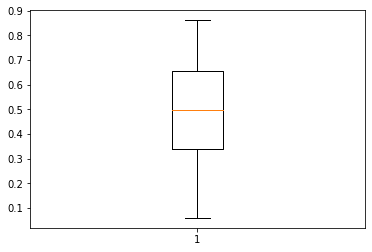

In [109]:
#Checking for outliers in Normalised Temperature
%matplotlib inline
plt.boxplot(day['normalised_temp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x183b3cc6ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x183b3cc9a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x183b3cc6708>],
 'medians': [<matplotlib.lines.Line2D at 0x183b3cc9b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x183b3cd0a48>],
 'means': []}

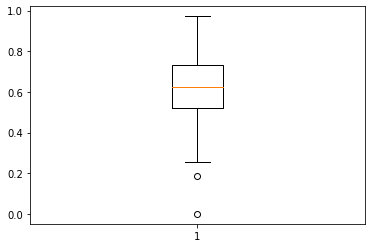

In [110]:
#Checking for outliers in Normalised Humidity
%matplotlib inline  
plt.boxplot(day['humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x183b3d28f48>,
 'caps': [<matplotlib.lines.Line2D at 0x183b3d2ec48>,
 'boxes': [<matplotlib.lines.Line2D at 0x183b3d28848>],
 'medians': [<matplotlib.lines.Line2D at 0x183b3d2ed88>],
 'fliers': [<matplotlib.lines.Line2D at 0x183b3d33c88>],
 'means': []}

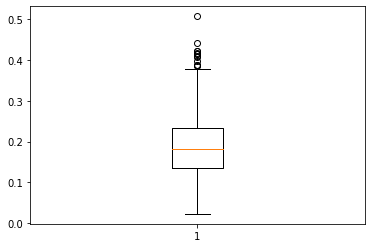

In [111]:
#Checking for outliers in Wind Speed
%matplotlib inline
plt.boxplot(day['windspeed'])

In [112]:
#Detect and delete outliers from data
x=["humidity","windspeed"]
for i in x:
    print(i)
    q75, q25 = np.percentile(day.loc[:,i], [75 ,25])
    #Calculating inner and outer fence
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    day = day.drop(day[day.loc[:,i] < min].index)
    day = day.drop(day[day.loc[:,i] > max].index)

humidity
0.20468725
1.0455212500000002
windspeed
-0.012431000000000025
0.380585


In [113]:
day.head(10)

,sr.no,year,holiday,workingday,normalised_temp,apparent_temp,humidity,windspeed,casual,registered,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_situation_1,weather_situation_2,weather_situation_3
0,1,0,0,0,0.344167,0.363625,0.805833,0.160446,331,654,...,0,0,0,0,0,0,1,0,1,0
1,2,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,...,1,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,0,1,0,0,0,0,0,1,0,0
3,4,0,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,...,0,0,1,0,0,0,0,1,0,0
4,5,0,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,...,0,0,0,1,0,0,0,1,0,0
5,6,0,0,1,0.204348,0.233209,0.518261,0.089565,88,1518,...,0,0,0,0,1,0,0,1,0,0
6,7,0,0,1,0.196522,0.208839,0.498696,0.168726,148,1362,...,0,0,0,0,0,1,0,0,1,0
7,8,0,0,0,0.165000,0.162254,0.535833,0.266804,68,891,...,0,0,0,0,0,0,1,0,1,0
8,9,0,0,0,0.138333,0.116175,0.434167,0.361950,54,768,...,1,0,0,0,0,0,0,1,0,0
9,10,0,0,1,0.150833,0.150888,0.482917,0.223267,41,1280,...,0,1,0,0,0,0,0,1,0,0


In [114]:
#Reordering Column by position
day.insert(37,"count",day.pop("count"))
day.head().transpose()

,0,1,2,3,4
sr.no,1,2,3,4,5
year,0,0,0,0,0
holiday,0,0,0,0,0
workingday,0,0,1,1,1
normalised_temp,0.344167,0.363478,0.196364,0.2,0.226957
apparent_temp,0.363625,0.353739,0.189405,0.212122,0.22927
humidity,0.805833,0.696087,0.437273,0.590435,0.436957
windspeed,0.160446,0.248539,0.248309,0.160296,0.1869
casual,331,131,120,108,82
registered,654,670,1229,1454,1518


## Feature Selection

### Correlation Analysis

In [115]:
numerical_var= ["normalised_temp","apparent_temp","humidity","windspeed","casual","registered","count"]
day_corr = day.loc[:,numerical_var]

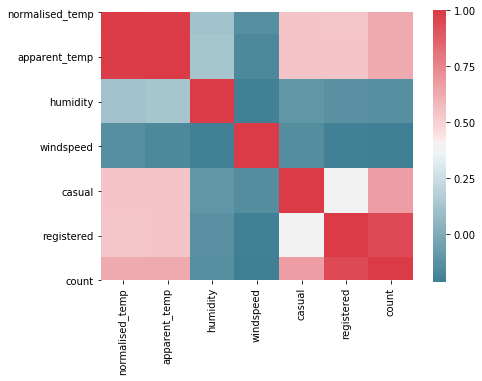

In [116]:
#Set the width and hieght of the plot
f,ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = day_corr.corr()

#Plot using seaborn library
sns.heatmap(cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, data=corr)


### Multicollinearity

In [117]:
multi_corr_var= ["normalised_temp","apparent_temp","humidity","windspeed","casual","registered"]
multi_corr = day.loc[:,multi_corr_var]

#function calculating VIF for each value of x and save in dataframe
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) 
    for i in range(x.shape[1])]
    return (vif)

In [118]:
calc_vif(multi_corr)

,variables,VIF
0,normalised_temp,494.190278
1,apparent_temp,569.713611
2,humidity,12.003364
3,windspeed,5.251659
4,casual,3.784493
5,registered,8.875360


### Dimension Reduction

In [119]:
#Dropping Apparent_temp to reduce the multicollinearity
day=day.drop(['sr.no','daynum','apparent_temp','casual','registered'],axis=1)


In [120]:
day.head()

,year,holiday,workingday,normalised_temp,humidity,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_situation_1,weather_situation_2,weather_situation_3,count
0,0,0,0,0.344167,0.805833,0.160446,1,0,0,0,...,0,0,0,0,0,1,0,1,0,985
1,0,0,0,0.363478,0.696087,0.248539,1,0,0,0,...,0,0,0,0,0,0,0,1,0,801
2,0,0,1,0.196364,0.437273,0.248309,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1349
3,0,0,1,0.200000,0.590435,0.160296,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1562
4,0,0,1,0.226957,0.436957,0.186900,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1600


## Model Development

In [121]:
#Store the data in the form of dependent and independant variables seperately
X = day.values[:,0:32]
Y = day.values[:,32] 

In [122]:
#Import Train_test_split
from sklearn.model_selection import train_test_split

In [123]:
#Split data into 80% train and 20 % test
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=3)

### Decision Tree Regression

In [124]:
#Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [125]:
#Initiate a Decision Tree Regressor
DT_model=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=3)

In [126]:
#Fit Decision Tree Regressor to training set
DT_model.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [127]:
#Predict test set labels
prediction_DT=DT_model.predict(X_test)

In [128]:
# To Compute test set R-square value
from sklearn import metrics

In [129]:
#Creating a function to calculate MAPE

def MAPE(y_true, y_pred):
    mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
    return mape

In [130]:
#print error metrics
r_square=metrics.r2_score(Y_test, prediction_DT)
print('R-square Value for Decision Tree Model is ',r_square)
mape_DT=MAPE(Y_test, prediction_DT)
print("The MAPE for Decision Tree Model is ",round(mape_DT,2),".")
accuracy_DT=100-mape_DT
print("The Accuracy for Decision Tree Model is ",round(accuracy_DT,2),"%.")

R-square Value for Decision Tree Model is  0.6581954003782842
The MAPE for Decision Tree Model is  25.2 .
The Accuracy for Decision Tree Model is  74.8 %.


### Random Forest Regression Model

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
#Initiate a Random Forest Regressor
RF_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [133]:
#Fit Decision Tree Regressor to training set
RF_model.fit(X_train, Y_train);

In [134]:
# Use the forest's predict method on the test data
prediction_RF = RF_model.predict(X_test)

In [135]:
#print Error Metrics
r_square=metrics.r2_score(Y_test, prediction_RF)
print('R-square Value for Random Forest Regression Model is ',r_square)
mape_RF=MAPE(Y_test, prediction_RF)
print("The MAPE for Random Forest Regression Model is ",round(mape_RF,2),".")
accuracy_RF=100-mape_RF
print("The Accuracy for Random Forest Regression Model is ",round(accuracy_RF,2),"%.")

R-square Value for Random Forest Regression Model is  0.8568462455978973
The MAPE for Random Forest Regression Model is  13.83 .
The Accuracy for Random Forest Regression Model is  86.17 %.


### Multiple Linear Regression Model

In [136]:
#import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm

In [137]:
#invoke the linear Regression function
LR_model = linear_model.LinearRegression()

In [138]:
#Fit Linear Regression model to training set
LR_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
#Use linear model prediction method on test data
prediction_LR=LR_model.predict(X_test)

In [140]:
#print Error Metrics
r_square=metrics.r2_score(Y_test, prediction_LR)
print('R-square Value for Linear Regression Model is ',r_square)
mape_LR=MAPE(Y_test, prediction_LR)
print("The MAPE for Linear Regression Model is ",round(mape_LR,2),".")
accuracy_LR=100-mape_LR
print("The Accuracy for Linear Regression Model is ",round(accuracy_LR,2),"%.")


R-square Value for Linear Regression Model is  0.7831526520414461
The MAPE for Linear Regression Model is  18.09 .
The Accuracy for Linear Regression Model is  81.91 %.
